# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [33]:
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    shape = (precision, *(size if type(size) == tuple else (size,)))
    return (coin(shape) * np.logspace(np.ones(size), np.ones(size) * precision, num=precision, base=0.5)).sum(0)


def plot_uniform_density(size=200):
    plt.figure(figsize=(16, 9))
    data = uniform(size)
    grid = np.linspace(-.25, 1.25, 500)
    plt.hist(data, bins=10, alpha=.4, density=True, label='Гистограмма сл. величины', color='lightblue')
    plt.plot(grid, uniform_pdf(grid), label='Плотность сл. величины', color='orange')
    plt.scatter(x=data, y=[0 for _ in data], alpha=.4, label='Выборка', color='yellow')
    plt.ylim(bottom=-.01)
    plt.legend(fontsize=12)
    plt.title(r'Случайная величина $\xi\sim U(0, 1)$', fontsize=18)
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
        plt.figure(figsize=(15, 3))
        plt.suptitle(r'Распределение $\xi\sim U(0, 1)$ в зависимости от точности', y=1.6, fontsize=18)
        for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
            plt.subplot(3, 2, i + 1)
            plt.ylabel(f'Точность = {precision}', fontsize=12)
            plt.scatter(
                uniform(size, precision),
                np.zeros(size),
                alpha=.4
            )
            plt.yticks([])
            if i < 4:
                plt.xticks([])
        plt.subplots_adjust(top=1.5)
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    return loc + scale * np.cos(2 * np.pi * uniform(size, precision)) * np.sqrt(-2 * np.log(uniform(size, precision)))


def plot_normal_density(size=200):
    plt.figure(figsize=(16, 9))
    data = normal(size)
    grid = np.linspace(-3, 3, 500)
    plt.hist(data, bins=10, alpha=.4, density=True, label='Гистограмма сл. величины', color='lightblue')
    plt.plot(grid, norm_pdf(grid), label='Плотность сл. величины', color='orange')
    plt.scatter(x=data, y=[0 for _ in data], alpha=.4, label='Выборка', color='yellow')
    plt.ylim(bottom=-.01)
    plt.legend(fontsize=12)
    plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=18)
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    return -np.log(1 - uniform(size, precision)) / lambd


def plot_expon_density(size=100):
    plt.figure(figsize=(16, 9))
    data = expon(size)
    grid = np.linspace(-.5, 5, 500)
    plt.hist(data, bins=10, alpha=.4, density=True, label='Гистограмма сл. величины', color='lightblue')
    plt.plot(grid, expon_pdf(grid), label='Плотность сл. величины', color='orange')
    plt.scatter(x=data, y=[0 for _ in data], alpha=.4, label='Выборка', color='yellow')
    plt.ylim(bottom=-.01)
    plt.legend(fontsize=12)
    plt.title(r'Случайная величина $\xi \sim Exp(\lambda)$', fontsize=18)
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    return plt.gcf()

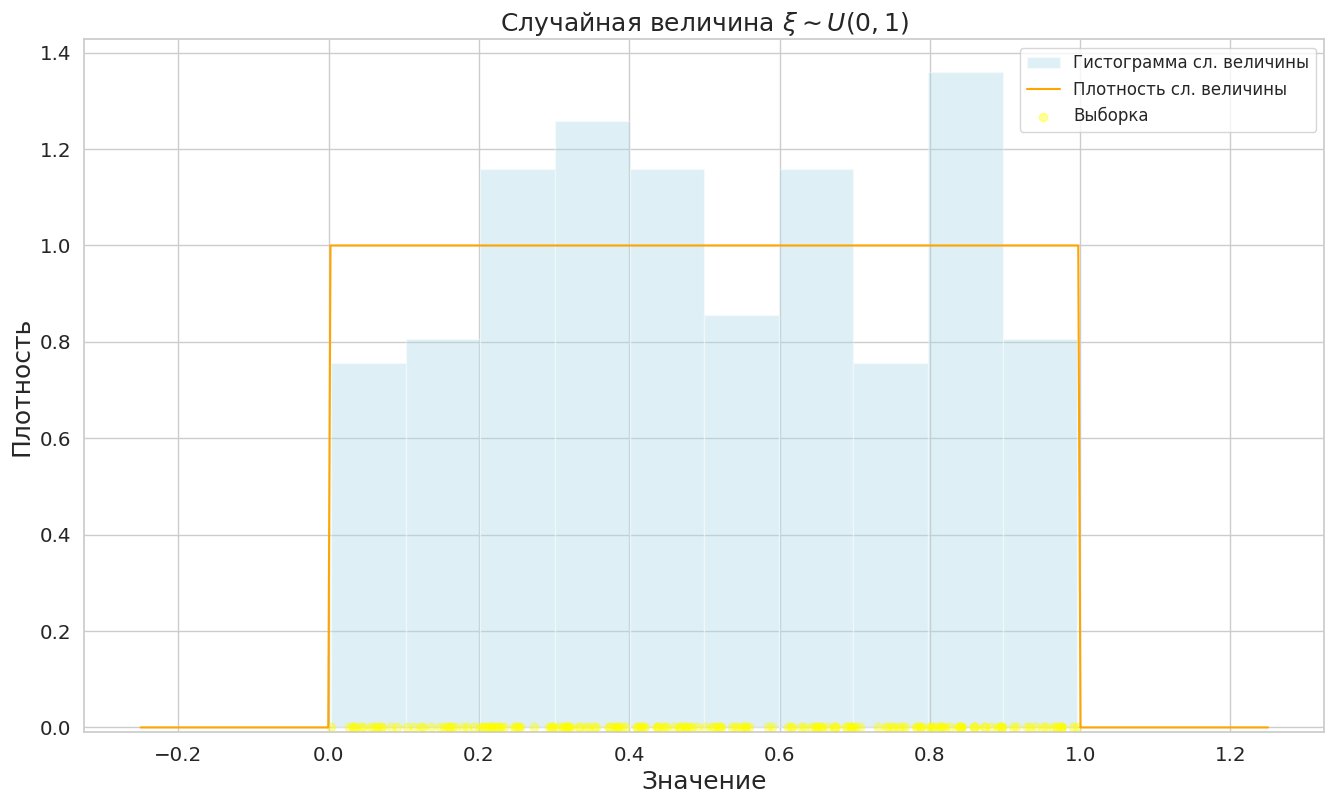

In [34]:
%%capture --no-display
plot_uniform_density().show()

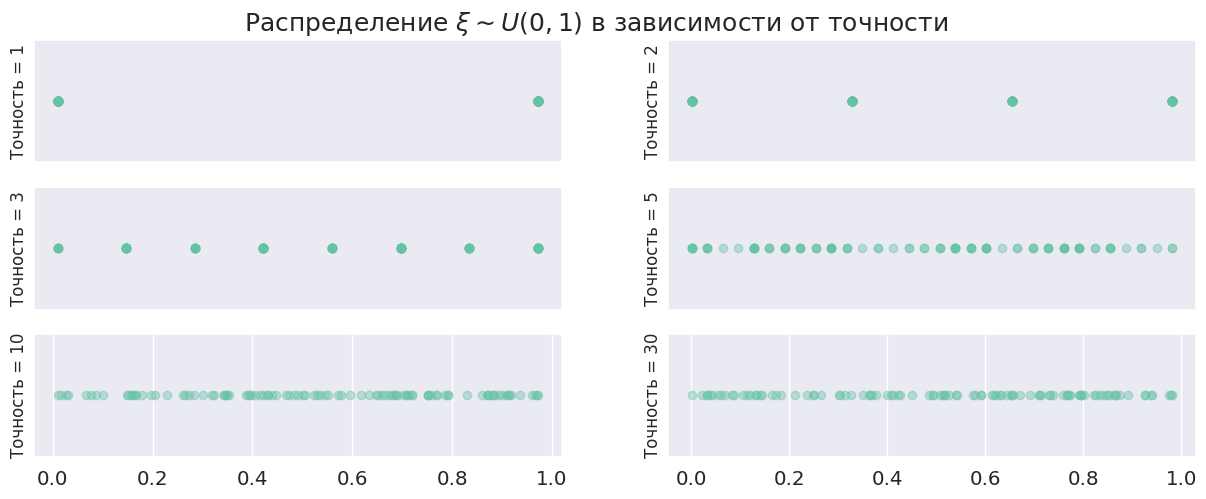

In [35]:
%%capture --no-display
plot_uniform_different_precision().show()

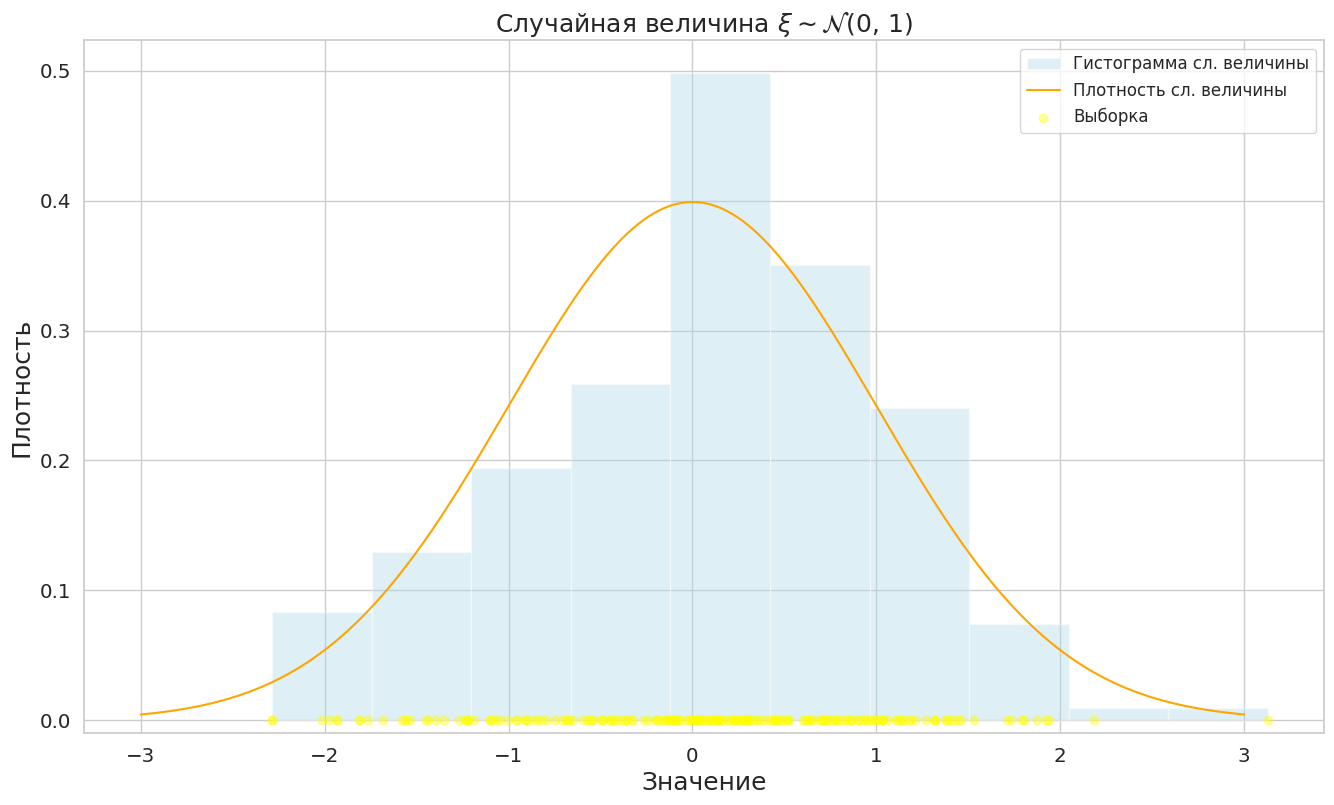

In [36]:
%%capture --no-display
plot_normal_density().show()

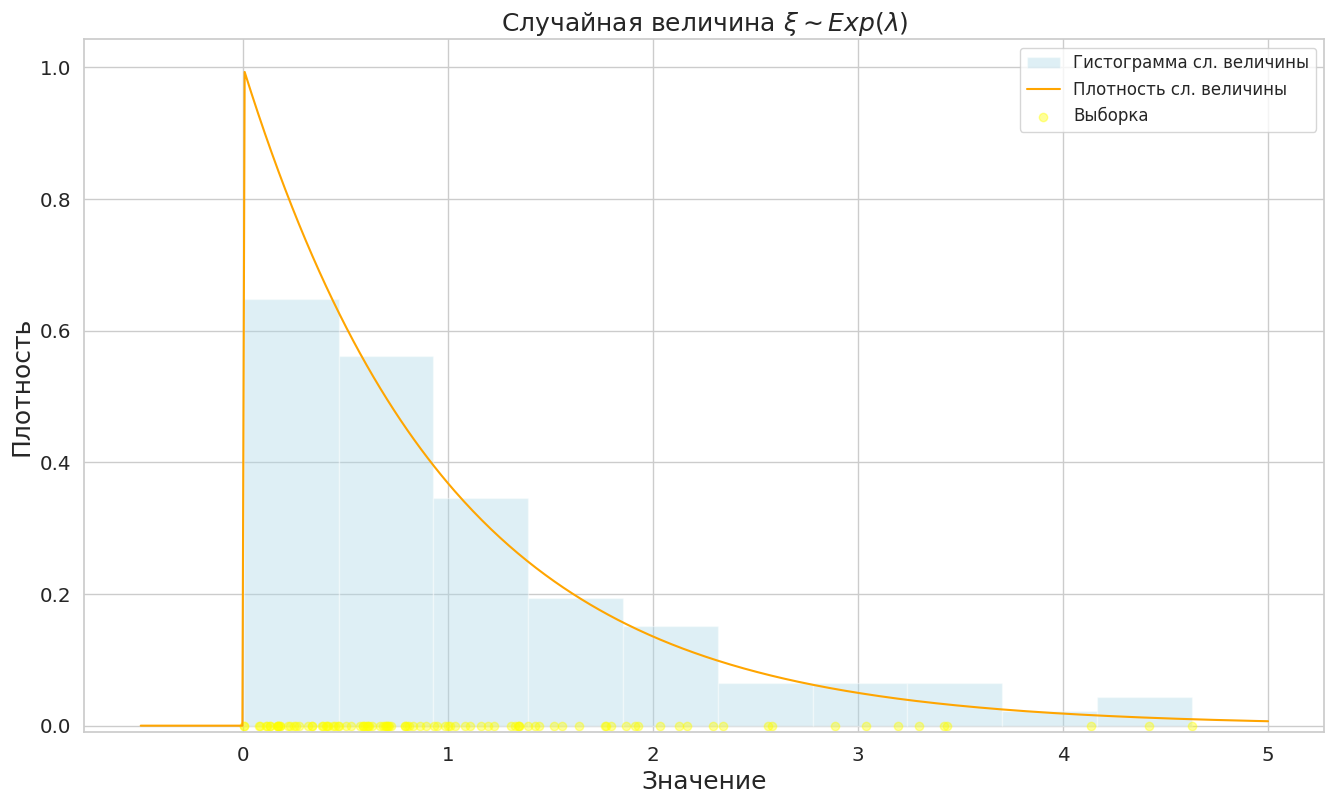

In [37]:
%%capture --no-display
plot_expon_density().show()

**Выводы:**

Проведенное исследование показало, что при помощи $Bern(1/2)$ можно генерировать $\xi \sim U(0,1)$ (при этом стоит отметить, что чем больше выбирается точность, тем равномернее распределены значения, видно по гр. 2), а используя равномерное распределение - $\xi \sim \mathcal{N}(\alpha, \delta^2)$ и $\xi \sim Exp(\lambda)$. Исследуя графики, становится понятно, что на выборке из 200 случайных величин наши генераторы выдают примерно такое распределение, какое и должно быть.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

In [29]:
cauchy_pdf = sps.cauchy.pdf


def compare_pdf(pdf1, pdf2, grid, label1, label2='Распределение Коши'):
    plt.figure(figsize=(16, 9))
    plt.plot(grid, pdf1(grid), label=label1, color='orange')
    plt.plot(grid, pdf2(grid), label=label2, color='blue')
    plt.title('Сравнение плотностей')
    plt.ylabel('Плотность')
    plt.xlabel('Значение')
    plt.legend(fontsize=12)
    return plt.gcf()

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

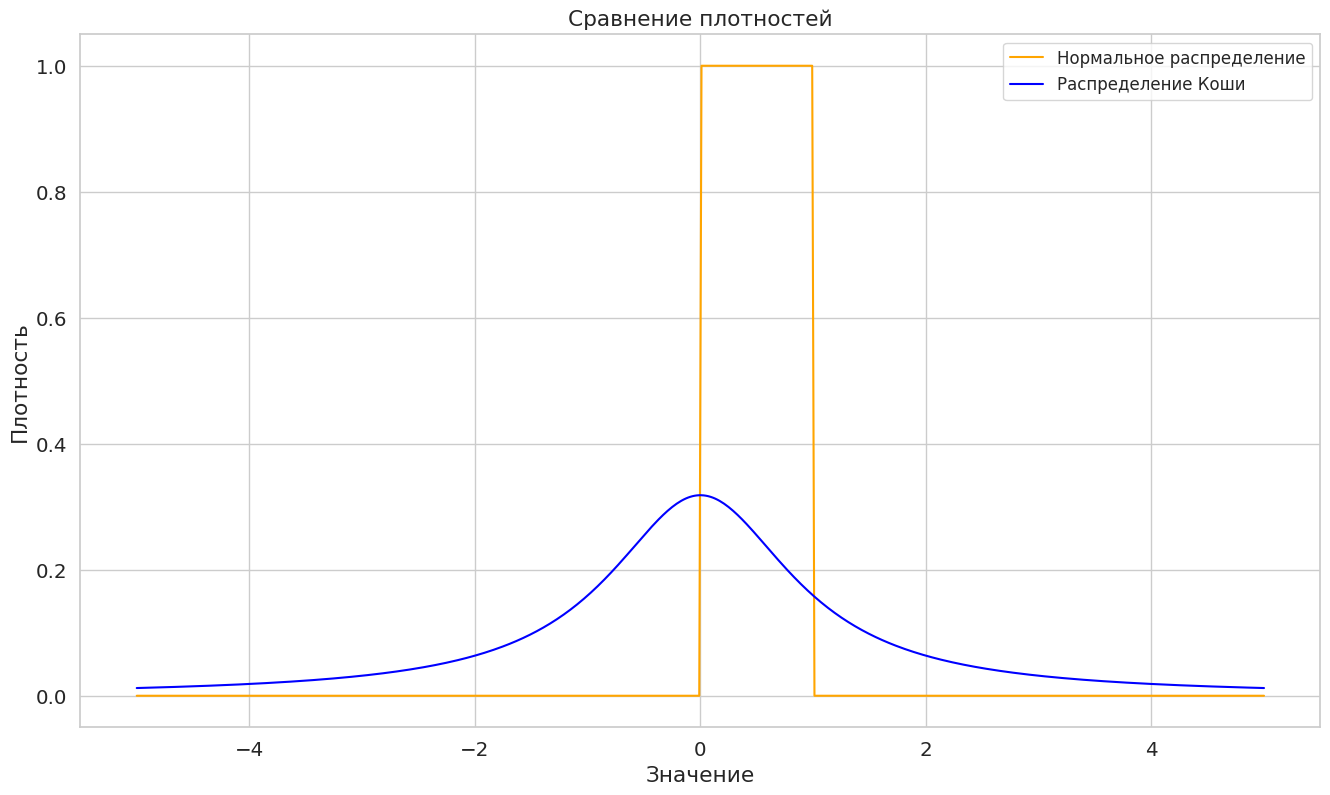

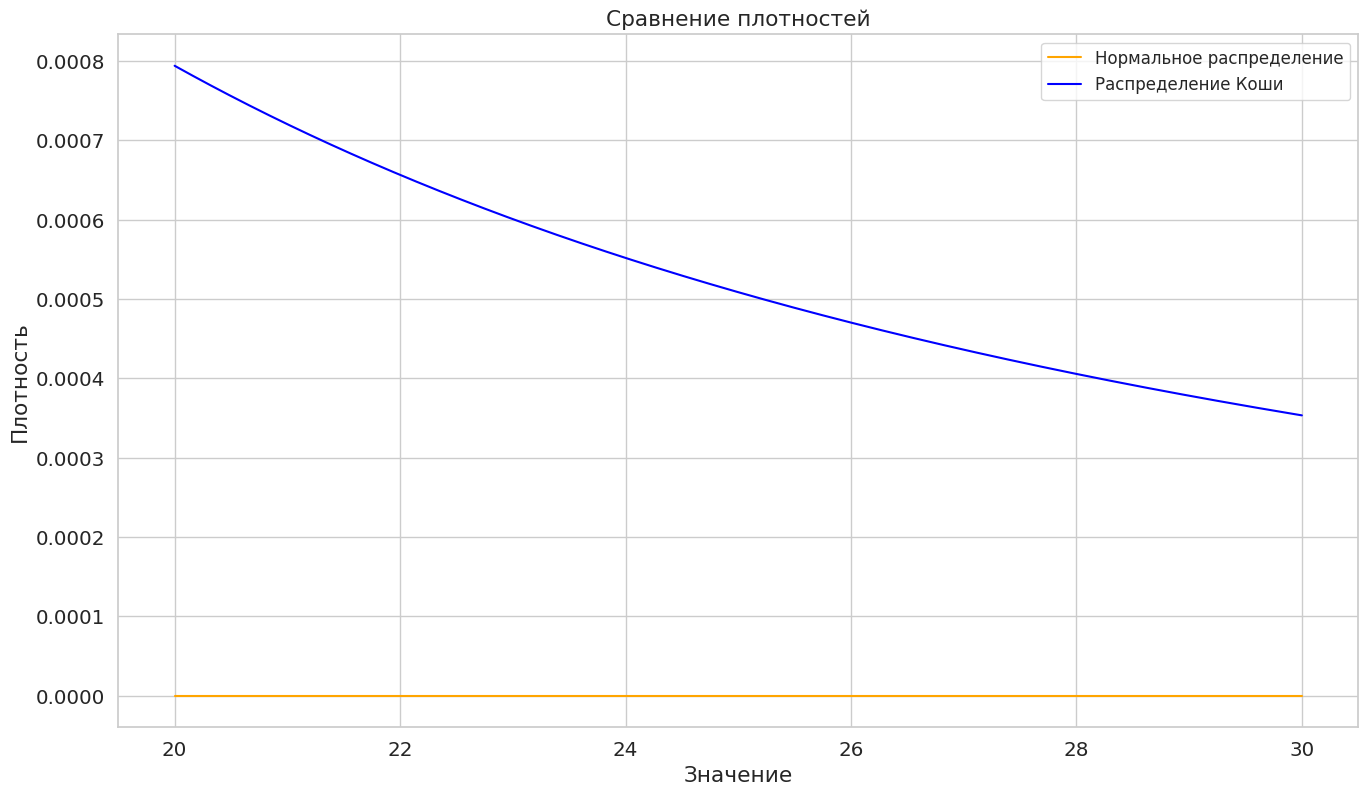

In [30]:
% % capture --no-display
compare_pdf(
    pdf1=uniform_pdf,
    pdf2=cauchy_pdf,
    grid=np.linspace(-5, 5, 500),
    label1='Нормальное распределение'
).show()
compare_pdf(
    pdf1=uniform_pdf,
    pdf2=cauchy_pdf,
    grid=np.linspace(20, 30, 500),
    label1='Нормальное распределение'
).show()

##### Как мы видим, плотность распределения Коши, в отличие от плотности нормального, не достигает нуля на вещественной прямой

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

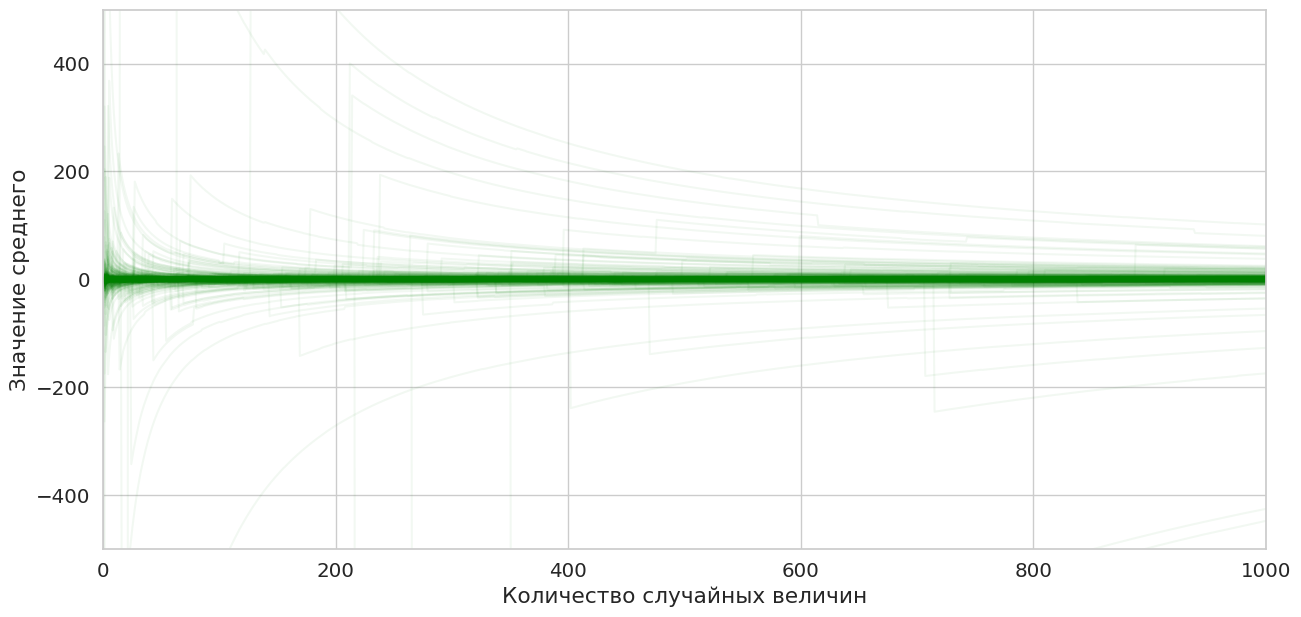

In [132]:
size = 1000
samples_count = 1000

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.ylim((-500, 500))
plt.xlim((0, size))
plt.show()

##### По периодически возникающим на графике 'ступенькам' можно понять, что ЗБЧ не выполняется

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

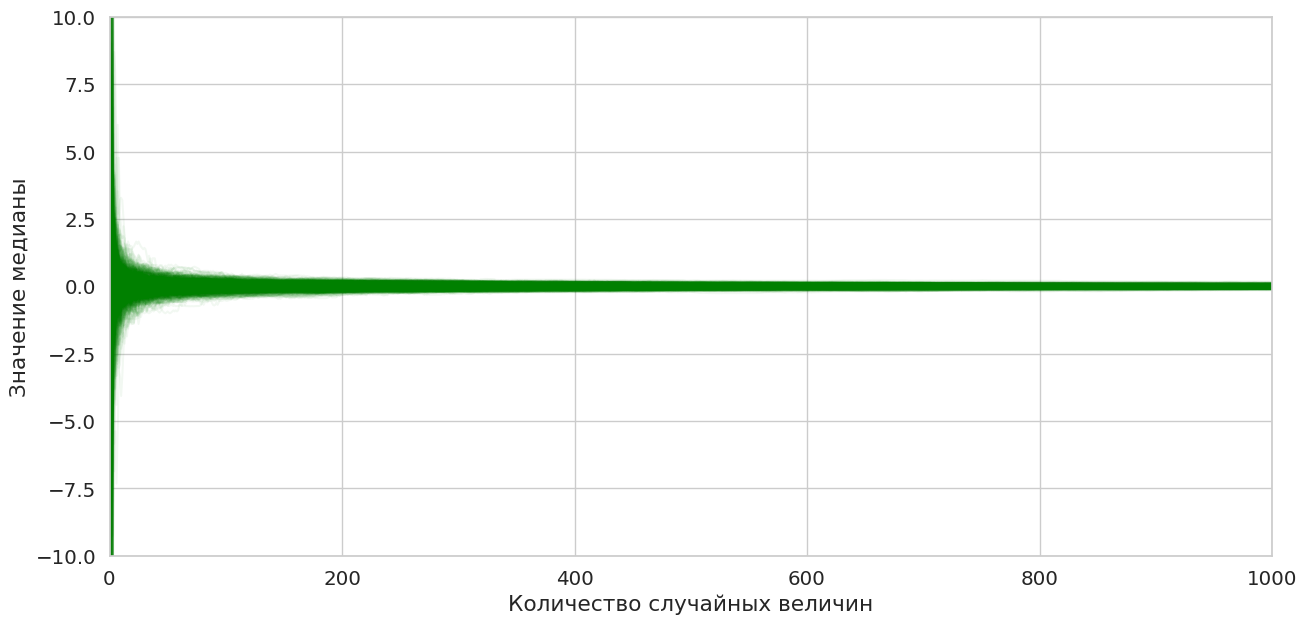

In [133]:
medians = [
    [
        np.median(samples[i][:j + 1]) for j in range(size)
    ] for i in range(samples_count)
]

plt.figure(figsize=(15, 7))

for i in range(samples_count):
    plt.plot(np.arange(size) + 1, medians[i], color='green', alpha=.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.ylim((-10, 10))
plt.show()

##### Уже на относительно небольших выборках становится видно, что медианы стремятся к нулю

**Вывод:**

##### Проведенное исследование дало понять, что плотность распределения Коши не равна нулю на всех значениях вещественной прямой, среднее значение этого распределения может сильно отклоняться от нуля даже на больших выборках, однако медиана стремится к нулю.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимент для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Минимальный n: 368


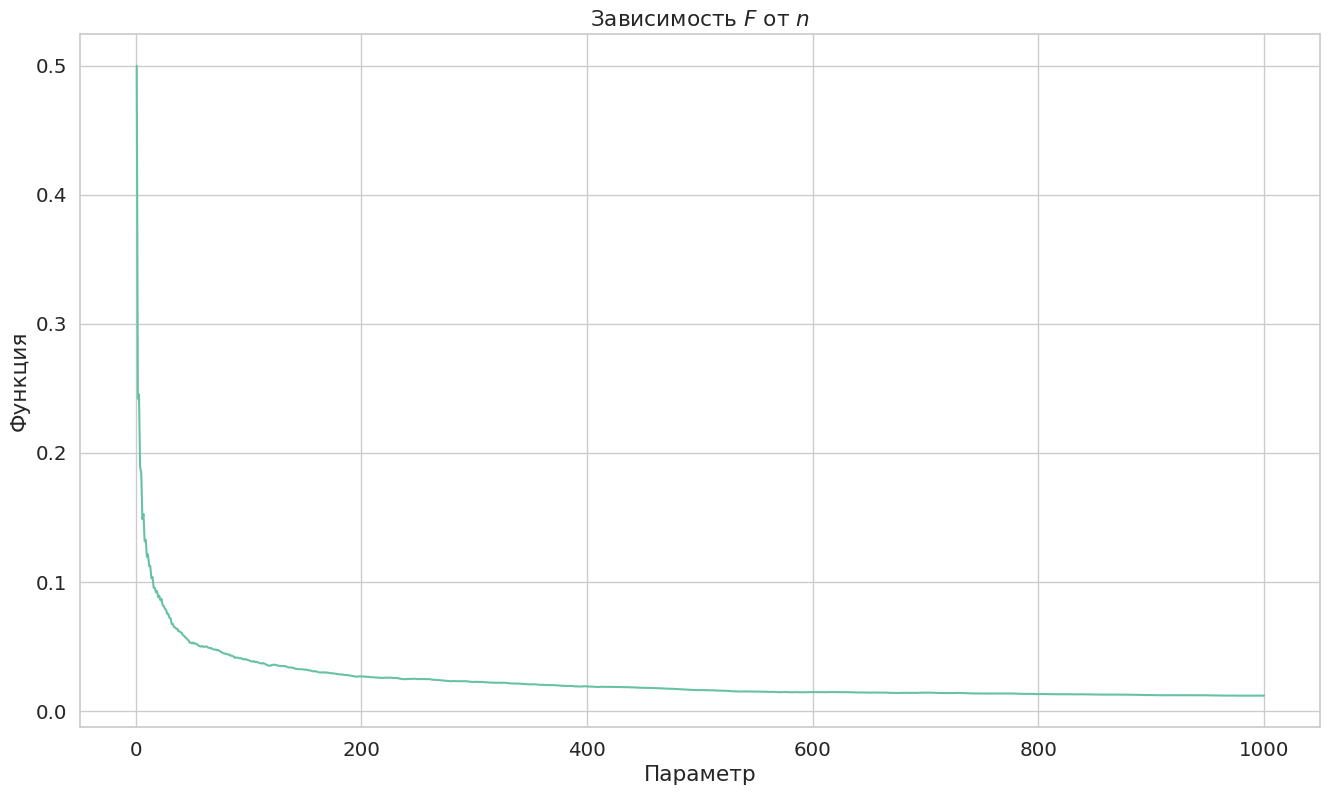

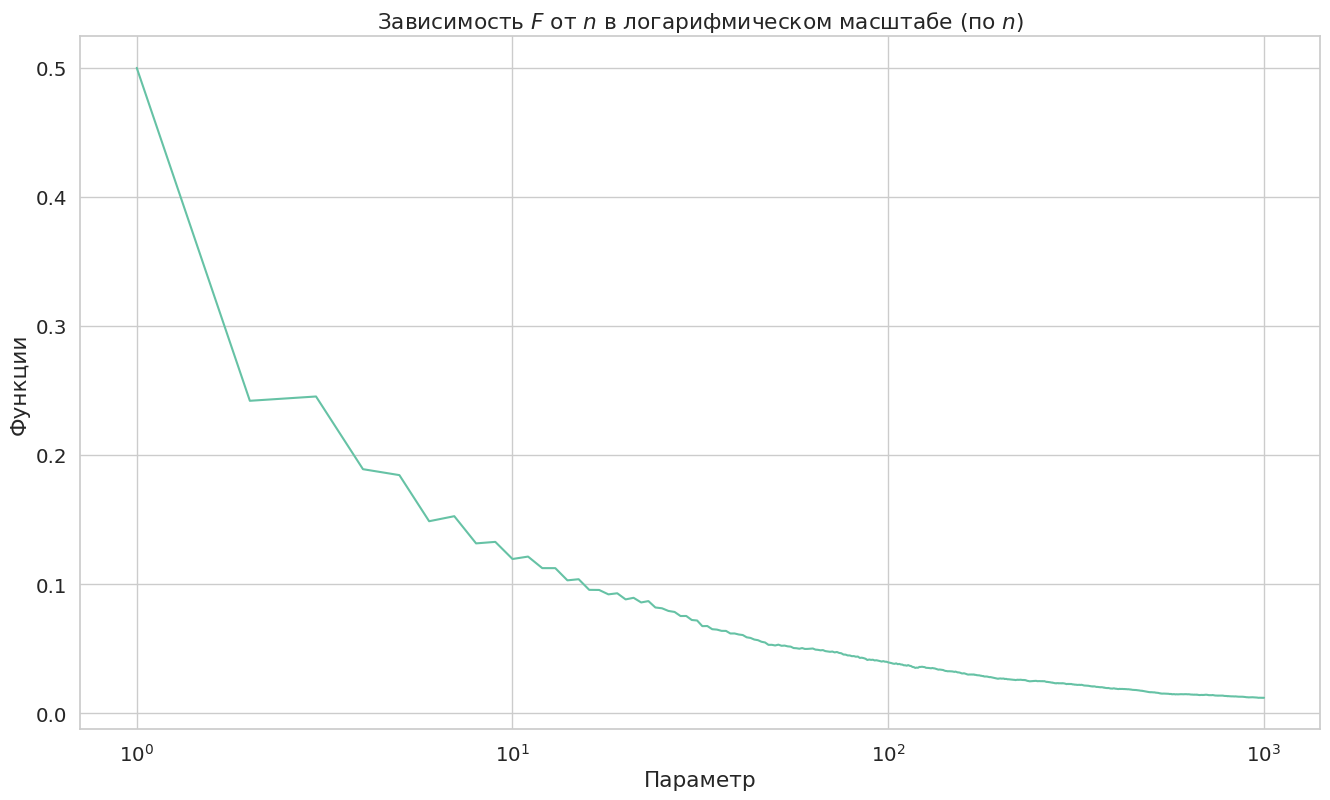

In [130]:
K = 500
Accuracy = .02
A = .5
max_sample_size = 1000

sample_ = sps.bernoulli.rvs(p=A, size=(K, max_sample_size))

F = lambda n, k, arr, a: np.abs(np.mean(arr[:, :n], axis=1) - a).sum() / k
values = lambda arr, k, accuracy, a, n: np.vectorize(lambda x: F(x, k, arr, a))(np.arange(n) + 1)
good_n = lambda arr, k, accuracy, a, max_n: np.where(
    np.vectorize(lambda x: F(x, k, arr, a) <= accuracy)(np.arange(max_n) + 1)
)[0] + 1
smallest_n = lambda arr, k, accuracy, a, max_n: good_n(arr, k, accuracy, a, max_n).min()

print(f'Минимальный n: {smallest_n(sample_, K, Accuracy, A, max_sample_size)}')

plt.figure(figsize=(16, 9))
plt.plot(np.arange(max_sample_size) + 1, values(sample_, K, Accuracy, A, max_sample_size))
plt.title('Зависимость $F$ от $n$')
plt.ylabel('Функция')
plt.xlabel('Параметр')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(np.arange(max_sample_size) + 1, values(sample_, K, Accuracy, A, max_sample_size))
plt.title('Зависимость $F$ от $n$ в логарифмическом масштабе (по $n$)')
plt.ylabel('Функции')
plt.xlabel('Параметр')
plt.xscale('log')
plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

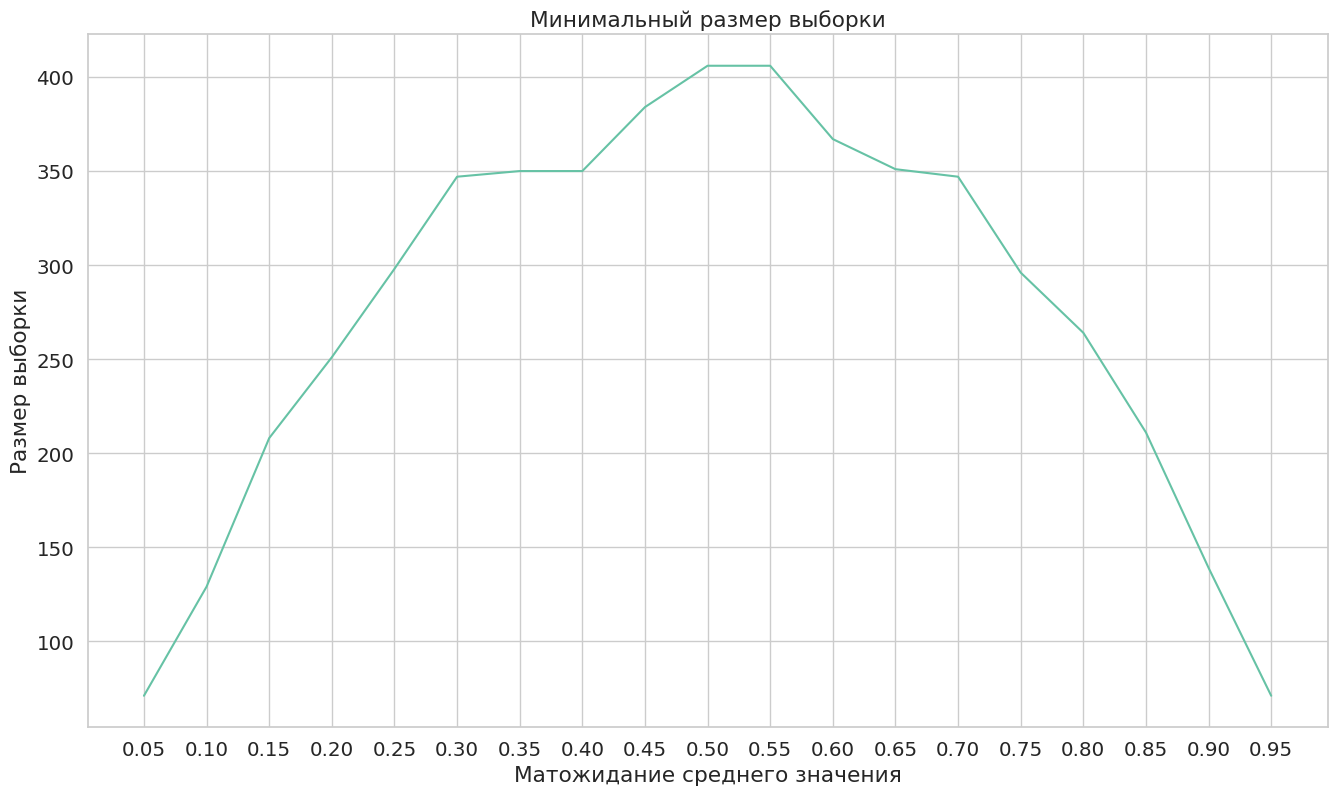

In [138]:
a_range = np.arange(.05, 1, .05)

plt.figure(figsize=(16, 9))
plt.plot(a_range,
         np.vectorize(lambda x: smallest_n(
             sps.bernoulli.rvs(p=x, size=(K, max_sample_size)), K, Accuracy, x, max_sample_size
         ))(a_range))
plt.title('Минимальный размер выборки')
plt.ylabel('Размер выборки')
plt.xlabel('Матожидание среднего значения')
plt.xticks(a_range)
plt.show()

**Выводы:**

##### Результаты данного эксперемента таковы: для того чтобы получить среднее значение $\xi \sim Bern(a)$ для $a=0.5$ приближенное к матожиданию с точностью не хуже чем $0.02$, в среднем необходима выборка из не менее чем $368$ значений (для данных выборок, в среднем я получал $n$ около $360-380$). Время на сбор данных можно оценить временем на получение где-то $400$ значений. Зависимость необходимого размера выборки от значения "ожидаемого матожидания" визуально напоминает обрезанный график плотности номрального распределения.